# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [9]:
diamonds.groupby("color").describe()["price"]

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
0,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0
1,5422.0,5091.874954,4722.387604,334.0,1120.5,3730.0,7201.75,18823.0
2,8304.0,4486.669196,4215.944171,337.0,984.0,3460.0,5980.25,18803.0
3,11292.0,3999.135671,4051.102846,354.0,931.0,2242.0,6048.00,18818.0
4,9542.0,3724.886397,3784.992007,342.0,982.0,2343.5,4868.25,18791.0
5,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
6,6775.0,3169.954096,3356.590935,357.0,911.0,1838.0,4213.50,18693.0


In [ ]:
"""
The average price decreases from worst to best color. However, since the standard deviation is very high, 
it is not possible to conclude that diamonds with the best color are less expensive (from a logical point of
view, this would not be true).
The minimum and maximum price is very similar between different colors.
"""

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
"""I think the features that will affect price the most are carat, color and clarity. 
The remaining features are related with carat."""

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [17]:
diamonds.groupby("color").agg({"carat":"mean",
                              "clarity":"mean",
                              "depth":"mean",
                              "table":"mean",
                              "price":"mean",
                              "x":"mean",
                              "y":"mean",
                              "z":"mean"})

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846368
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.984776,5.981484,3.699147
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507966
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.465788
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
"""
Diamonds with better colors are smaller (less carats) on average
Diamonds with better colors are cheaper (lower price) on average
It seems that the color doesnt affect clarity, depth, table, x, y and z
"""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

<AxesSubplot:ylabel='Frequency'>

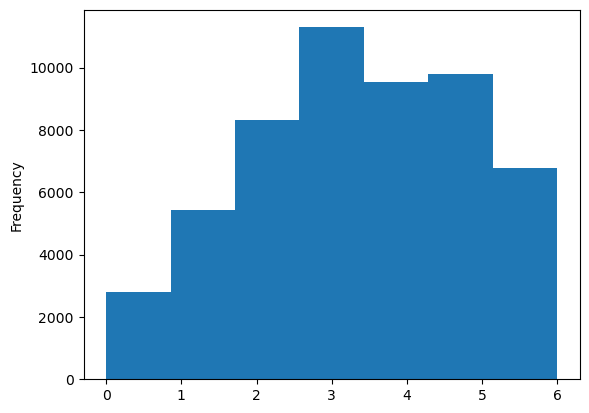

In [21]:
diamonds["color"].plot.hist(bins=7)

In [ ]:
# The colors 3, 4 and 5 are more frequent

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [32]:
diamonds.groupby("carat").agg({"color":"mean",
                              "clarity":"mean",
                              "depth":"mean",
                              "table":"mean",
                              "price":"mean",
                              "x":"mean",
                              "y":"mean",
                              "z":"mean"})

,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,
0.20,5.166667,2.833333,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333
0.21,5.444444,2.666667,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,4.800000,2.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000
0.23,4.518771,4.901024,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468
0.24,4.185039,4.972441,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...
4.00,1.000000,0.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,0.500000,0.000000,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000
4.13,2.000000,0.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000


In [ ]:
"""
Bigger diamonds (more carats) have a worse color and clarity, on average
Bigger diamonds (more carats) are more expensive (higher price), on average
Bigger diamonds (more carats) have a higher x, y and z, on average, as expected
It seems that the carats dont affect depth and table
"""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<AxesSubplot:ylabel='Frequency'>

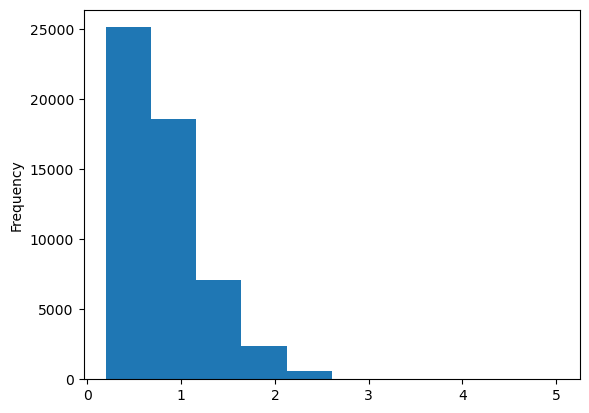

In [30]:
diamonds["carat"].plot.hist(bins=10)

# Smaller diamonds (less carats) are more frequent

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [33]:
diamonds.groupby("table").agg({"carat":"mean",
                              "color":"mean",
                              "clarity":"mean",
                              "depth":"mean",
                              "price":"mean",
                              "x":"mean",
                              "y":"mean",
                              "z":"mean"})

,carat,color,clarity,depth,price,x,y,z
table,,,,,,,,
43.0,1.0400,1.0,4.00,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,5.0,4.00,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,3.0,3.00,64.25,2290.5,5.355,5.320,3.425
50.0,1.5100,3.0,2.00,61.50,8995.5,7.380,7.295,4.510
50.1,0.9400,2.0,1.00,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...,...,...
71.0,0.6800,3.0,2.00,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,4.5,3.25,68.90,2406.5,5.520,5.465,3.745
76.0,0.7900,3.0,2.00,65.30,2362.0,5.520,5.130,3.350


In [ ]:
"""
I cannot find any relation between table and the remaining features
"""

**Finally, do the same with the `clarity` column.**

In [ ]:
#diamonds.head()
diamonds.groupby("clarity").agg({"carat":"mean",
                              "color":"mean",
                              "depth":"mean",
                              "table":"mean",
                              "price":"mean",
                              "x":"mean",
                              "y":"mean",
                              "z":"mean"})

In [ ]:
"""
Diamonds with higher clarity are smaller (less carats and lower x, y and z), on average
Diamonds with higher clarity are cheaper (lower price), on average
It seems that clarity doesnt affect color, depth and table
"""

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
"""
I still think that carat, color and clarity are the features that will affect price the most. 
However, we cannot draw any conclusions by analysing average prices considering only one feature individually.
For example, by analysing only the color, we could wrongly conclude that diamonds with better colors 
are cheaper, on average. 
However, this effect is due to size and not the color, because on average, the diamonds with better colors are
smaller and, consequently, cheaper. 
"""

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


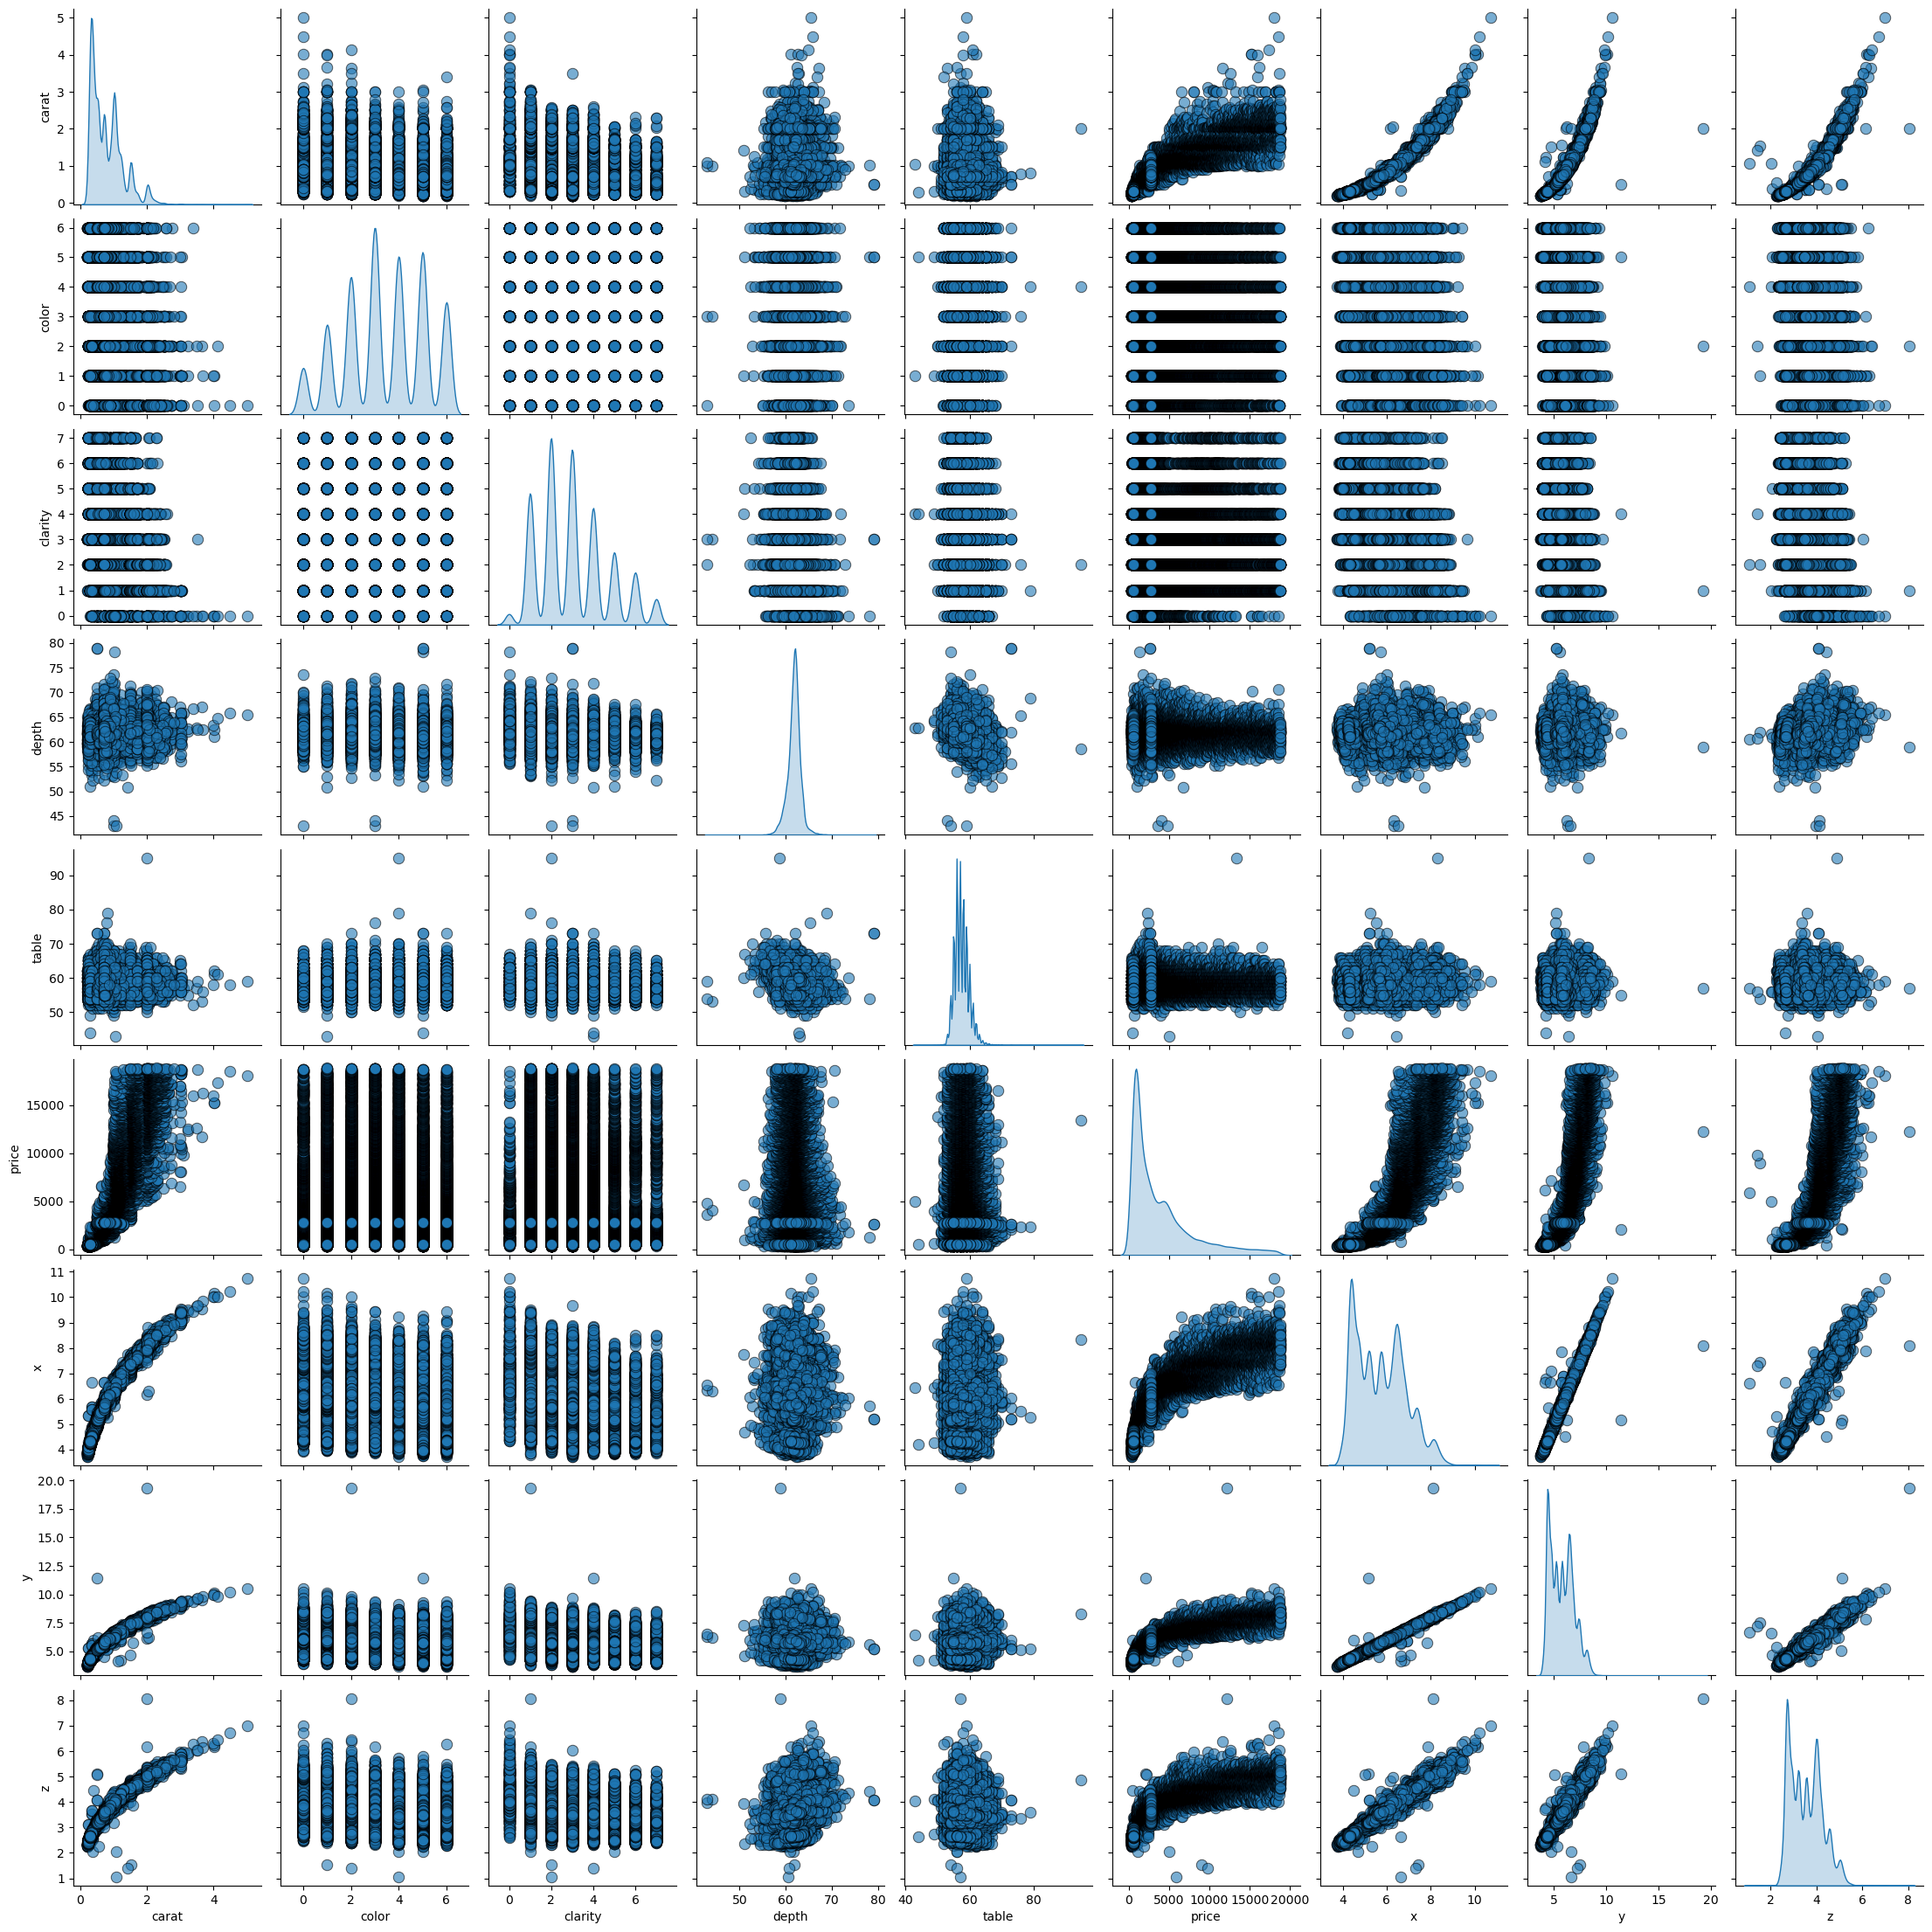

In [34]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
"""
- Diamonds with better colors are smaller (less carats) on average
- Diamonds with higher clarity are smaller (less carats and lower x, y and z), on average
- (Same as the two previous points) Bigger diamonds (more carats) have a worse color and clarity, on average
- Bigger diamonds (more carats) are more expensive (higher price), on average

The relation price-color and price-clarity is no longer that evident as there is a lot of dispersion, 
that had been concealed when analysing only the means

"""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

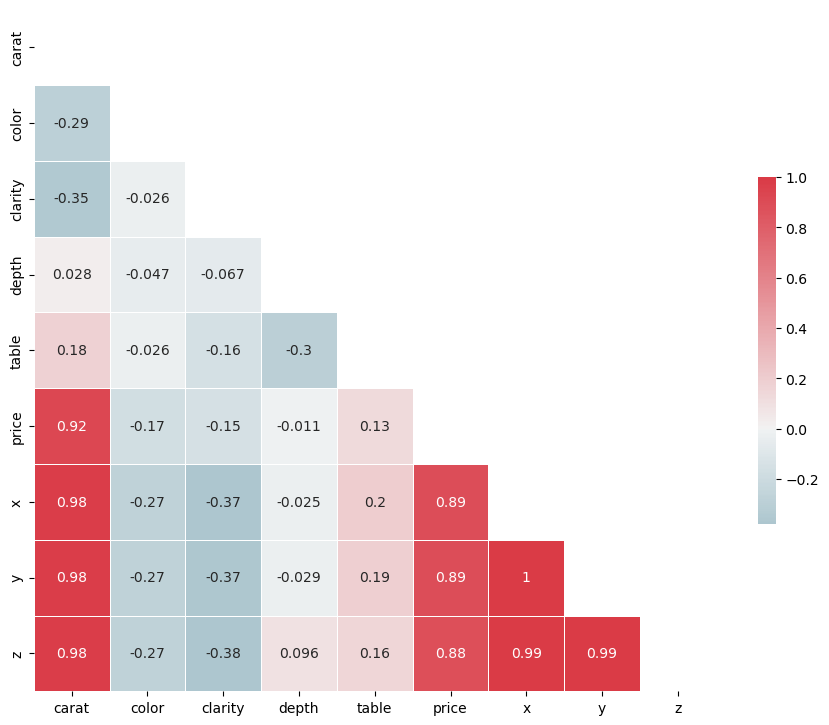

In [42]:
corr = diamonds.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool)) # can remove this to have the full matrix
# np.triu - makes an array which the upper right part of the rectangle is true and the bottom left is false  

#the colors you like
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)



**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
"""
Yes, it is in agreement with what was discussed before:
- Carat is highly correlated with price and moderately correlated with color and clarity
- Color and clarity do not seem to be correlated with price

As such, my prediction (carat, color and clarity affect price) was incorrect as only carat 
is correlated with price
"""

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

Slope:  7756.425617968453
Intercept:  -2256.3605800454166
R-scor:  0.9215913011934791
P-value:  0.0
Standard Error:  14.066578727561128


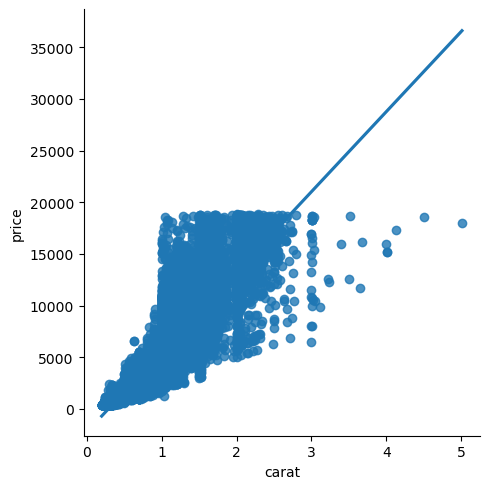

In [52]:
from scipy import stats

sns.lmplot(x ='carat', y ='price', data = diamonds)

slope, intercept, r_score, p_value, std_err = stats.linregress(diamonds["carat"], diamonds["price"])
print("Slope: ", slope)      # the average change in the price of a diamond for every unit increase in its weigh
print("Intercept: ", intercept) #  the average price of a diamond with a weight of zero
print("R-scor: ", r_value)  # correlation
print("P-value: ", p_value)  # the probability that the observed correlation between the two variables could have occurred by chance
print("Standard Error: ", std_err) # how much the estimated regression line deviates from the actual values of the dependent variable
    

**What do you think?**

In [ ]:
"""These results suggest that there is a strong positive correlation between the price and carat,
meaning that when carat increases, the price is expected to increase as well. The R^2 score is close to 1 
and the standard error is small, which indicates that the model is a good fit to the data. Moreover, the low 
P-value indicates that the correlation is statistically significant and not due to random chance."""


**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
"""By curiosity, I would also explore the moderate correlation in carat-color and carat-clarity."""

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.